In [18]:
pip install opencv-python

In [19]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import numpy as np

In [20]:
dir= 'D:\\Users\\PRIYA\\Pictures\\leaf'
categories=['bacterial leaf','algal','fusarium']
data=[]
for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)
    
    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        leaf_img=cv2.imread(imgpath,0)
        leaf_img=cv2.resize(leaf_img,(50,50))
        image=np.array(leaf_img).flatten()
        data.append([image,label])
print("The total is")
print(len(data))
pick_in=open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()        

The total is
32


Support Vector Machine
SVM [1 0 2 0 1 1 2]
Accuracy:  0.0
Prediction:  algal


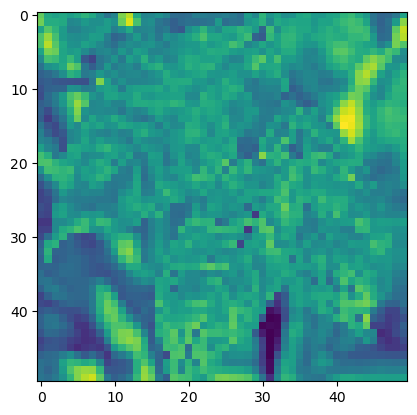

In [21]:
pick_in=open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

random.shuffle(data)
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)
    
print("Support Vector Machine") 
data = load_digits()
x, y = data.data, data.target
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.2)
model= SVC(C=1,kernel='linear',gamma='scale')
model.fit(xtrain, ytrain)
predicted=model.predict(xtest)
print("SVM",predicted)



#pick= open('model.sav','rb')
#model=pickle.load(pick)
#pick.close()

#prediction= model.predict(xtest)

accuracy= model.score(xtest,ytest)
categories=['bacterial leaf','algal','fusarium']

print('Accuracy: ',accuracy)

print('Prediction: ',categories[predicted[0]])

myleaf=xtest[0].reshape(50,50)
plt.imshow(myleaf)
plt.show()



Decision Tree
DecisionTree [0 1 1 0 2 1 0]
Accuracy:  0.2857142857142857
Prediction1:  bacterial leaf


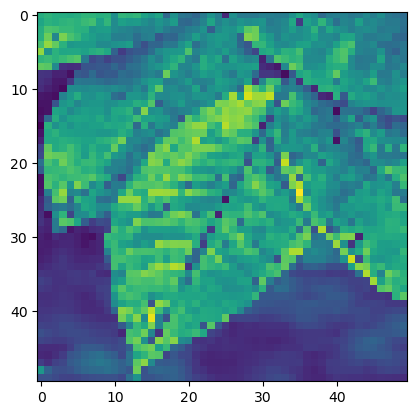

In [22]:
print("Decision Tree")
data = load_digits()
x, y = data.data, data.target
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(xtrain, ytrain)
predicted1=model.predict(xtest)
print("DecisionTree",predicted1)

accuracy= model.score(xtest,ytest)
categories=['bacterial leaf','algal','fusarium']

print('Accuracy: ',accuracy)
1
print('Prediction1: ',categories[predicted1[0]])

myleaf=xtest[0].reshape(50,50)
plt.imshow(myleaf)
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
data = load_digits()
x, y = data.data, data.target
lr_clf=LinearRegression()
lr_clf.fit(xtrain,ytrain)

LinearRegression()

Accuracy:  0.2857142857142857
Prediction1:  bacterial leaf


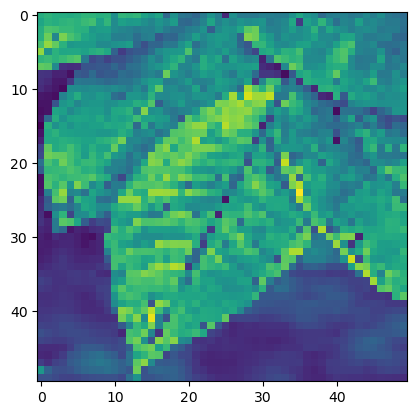

In [24]:
accuracy= model.score(xtest,ytest)
categories=['bacterial leaf','algal','fusarium']

print('Accuracy: ',accuracy)

print('Prediction1: ',categories[predicted1[0]])
myleaf=xtest[0].reshape(50,50)
plt.imshow(myleaf)
plt.show()


Random forest
Accuracy:  0.2857142857142857
Prediction1:  bacterial leaf


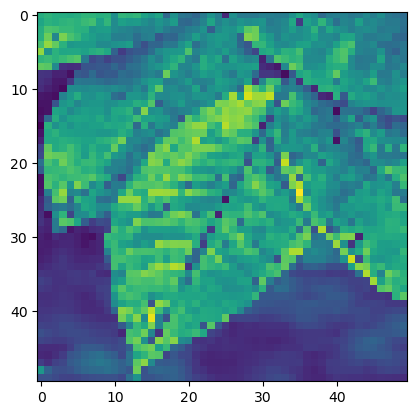

In [25]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy") 
print("Random forest")
data = load_digits()
x, y = data.data, data.target
classifier.fit(xtrain, ytrain) 
accuracy= model.score(xtest,ytest)
categories=['bacterial leaf','algal','fusarium']

print('Accuracy: ',accuracy)

print('Prediction1: ',categories[predicted1[0]])
myleaf=xtest[0].reshape(50,50)
plt.imshow(myleaf)
plt.show()


In [33]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=4, test_size=0.1, random_state=0)

linear_reg_scores=cross_val_score(LinearRegression(), x, y, cv=cv)

dt_scores=cross_val_score(DecisionTreeClassifier(), x, y, cv=cv)

svm_scores = cross_val_score(SVC(), x, y, cv=cv)

rf_scores= cross_val_score(RandomForestClassifier(), x, y, cv=cv)

In [34]:
linear_reg_mean = linear_reg_scores.mean()
dt_mean = dt_scores.mean()
svm_mean = svm_scores.mean()
rf_mean = rf_scores.mean()

In [41]:
print("Mean Cross-Validation Scores:")
print(f"{'Model':<25} {' Score':<15}")
print('-' * 40)
print(f"{'Linear Regression':<25} {linear_reg_mean:.2f}")
print('-' * 40)
print(f"{'Decision Tree Classifier':<25} {dt_mean:.2f}")
print('-' * 40)
print(f"{'Support Vector Machine':<25} {svm_mean:.2f}")
print('-' * 40)
print(f"{'Random Forest Classifier':<25} {rf_mean:.2f}")


Mean Cross-Validation Scores:
Model                      Score         
----------------------------------------
Linear Regression         0.56
----------------------------------------
Decision Tree Classifier  0.85
----------------------------------------
Support Vector Machine    0.99
----------------------------------------
Random Forest Classifier  0.98


In [42]:
best_model = max([(linear_reg_mean, "Linear Regression"),
                  (dt_mean, "Decision Tree Classifier"),
                  (svm_mean, "Support Vector Machine"),
                  (rf_mean, "Random Forest Classifier")])
print("The best model is:", best_model[1])

The best model is: Support Vector Machine
